### Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Import Data

In [3]:
uber_data = pd.read_csv('Uber Request Data.csv')
uber_data.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


In [4]:
uber_data.shape

(6745, 6)

In [5]:
# As the dates in 'Request timestamp' and 'Drop timestamp' are in different format. we have standardize it.

In [6]:
uber_data['Request timestamp']=uber_data['Request timestamp'].astype(str)
uber_data['Request timestamp']=uber_data['Request timestamp'].str.replace('/','-')
uber_data['Request timestamp']=pd.to_datetime(uber_data['Request timestamp'],dayfirst=True)
uber_data['Drop timestamp']=pd.to_datetime(uber_data['Drop timestamp'],dayfirst=True)
uber_data

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


#### Lets inspect the data

In [7]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [8]:
# some import things like mean max check by describe
uber_data.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [9]:
uber_data.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [10]:
# Lets check duplicated rows based on request ID

dup_check = uber_data["Request id"].duplicated()
dup_check.sum()

0

In [11]:
#Let us check null values in Drivers id

uber_data[np.isnan(uber_data['Driver id'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
4095,1362,City,NaN,No Cars Available,2016-07-11 00:02:00,NaT
4096,1364,City,NaN,No Cars Available,2016-07-11 00:06:00,NaT
4097,1366,City,NaN,No Cars Available,2016-07-11 00:09:00,NaT
4098,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT
4099,7,Airport,NaN,No Cars Available,2016-07-11 00:30:00,NaT
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [12]:
# We can see that 'Driver Id' is NaN when status is 'No Cars Available' 

In [13]:
# Imputing NaN values in 'Driver Id' with 0 

uber_data['Driver id'] = uber_data[['Driver id']].fillna(0).astype(int)
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   int32         
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(2)
memory usage: 289.9+ KB


#### Lets check NaT values in 'Drop timestamp'

In [14]:
uber_data[np.isnat(uber_data['Drop timestamp'])]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
2831,2905,City,1,Cancelled,2016-07-13 06:08:41,NaT
2832,4805,City,1,Cancelled,2016-07-14 17:07:58,NaT
2833,5202,Airport,1,Cancelled,2016-07-14 20:51:37,NaT
2834,5927,City,1,Cancelled,2016-07-15 10:12:40,NaT
2835,2347,Airport,2,Cancelled,2016-07-12 19:14:00,NaT
...,...,...,...,...,...,...
6740,6745,City,0,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,0,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,0,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,0,No Cars Available,2016-07-15 23:54:39,NaT


In [15]:
# Drop the 'Drop timestamp' column as it will not be used for analysis.
uber_data = uber_data.drop(['Drop timestamp'], axis=1) 
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00
2,1807,City,1,Trip Completed,2016-07-12 09:17:00
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00
4,3112,City,1,Trip Completed,2016-07-13 08:33:16


In [16]:
#Checking null value percetage in each column

round(100*(uber_data.isnull().sum()/len(uber_data.index)), 2)

Request id           0.0
Pickup point         0.0
Driver id            0.0
Status               0.0
Request timestamp    0.0
dtype: float64

In [17]:
# Lets create new column called request hour from the request timestamp column
#to identify the hours where supply demand gap exists
uber_data['Request hour'] = uber_data['Request timestamp'].apply(lambda x: x.strftime('%H'))
uber_data['Request hour'] =  uber_data['Request hour'].astype(int)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8


#### Lets create binning in TIme categories

In [18]:
# Lets create new column from the 'Request hour' column by categorizing it into following
# 4:00 Am to 7:59Am is Early morning
# 8:00 AM to 11:59 is Morning
# 12:00 to 15:59 is Afternoon
# 16:00 to 19:59 is Evening
# 20:00 to 23:59 is Night
# 24:00 to 3:59 AM is late Night

def timeslot(x):
    if x >= 4 and x < 8:
        return 'Early Morning'
    elif x >= 8 and x < 12:
        return 'Morning'
    elif x >= 12 and x < 16:
        return 'Afternoon'
    elif x >= 16 and x < 20:
        return 'Evening'
    elif x >= 20:
        return 'Night'
    elif x >= 0 and x < 4:
        return 'Late Night'
    
uber_data['Request timeslot'] = uber_data['Request hour'].apply(timeslot)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning


In [19]:
# Lets create a new column 'Request dayofweek' by getting the day of week from the 'Request timestamp' column

uber_data['Request dayofweek'] = uber_data['Request timestamp'].dt.day_name()
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday


### Data Analysis

#### Lets analyse the number of requests Status (Univariate Analysis)

Text(-2.6999999999999957, 0.5, 'Frequency')

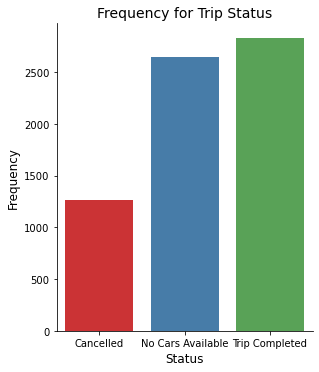

In [20]:


order_status = uber_data['Status'].sort_values(ascending = True).unique().tolist()

plot = sns.catplot(x="Status", kind="count", data=uber_data, palette="Set1", aspect= .9, order=order_status);

plt.title('Frequency for Trip Status', fontsize = 14)
plt.xlabel("Status", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)

In [21]:
# We can see that frequency of "No cars available" status is higher than the number of "Cancelled" status.

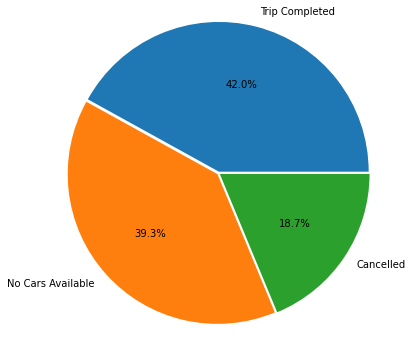

In [22]:
# Lets create a pie chart for above graph 

uber_data.loc[(uber_data.Status =="Trip Completed"),'TripComp'] =1
uber_data.loc[(uber_data.Status =="No Cars Available"),'NoCars'] =1
uber_data.loc[(uber_data.Status =="Cancelled"),'Cancel'] =1


labels = ['Trip Completed', 'No Cars Available', 'Cancelled']
sizes = [uber_data['TripComp'].value_counts()[1],
         uber_data['NoCars'].value_counts()[1],
         uber_data['Cancel'].value_counts()[1],
         ]

myexplode = [0.01, 0.01, 0.01]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, explode=myexplode)
plt.axis('equal')
plt.show()

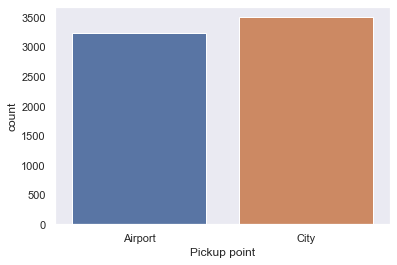

In [23]:
# Lets plot a countplot for pickup point

sns.set(style="dark")
ax = sns.countplot(x="Pickup point", data=uber_data)
plt.show()

In [24]:
# We can see taht pick up point in city are higher than at Airport

#### Lets analyze Status and Pickup point (Bivariate analysis)

In [25]:
uber_data.groupby(['Status','Pickup point']).size()

Status             Pickup point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

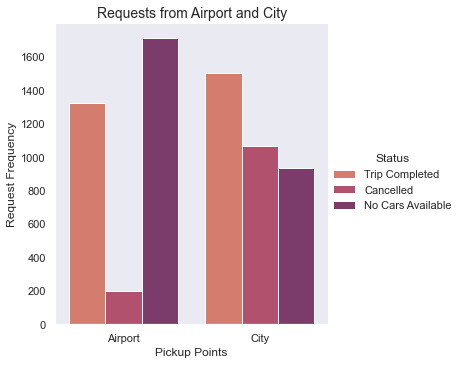

In [26]:
#Identify the number of requests for trips originating from airport and city for all the 3 trip status.

plot = sns.catplot(data=uber_data, x="Pickup point", hue="Status", palette='flare', kind="count" );

plt.title('Requests from Airport and City', fontsize = 14)
plt.xlabel("Pickup Points", fontsize = 12)
plt.ylabel("Request Frequency", fontsize = 12)
plt.show()

 We Can see that
 - 'No Cars Available' status count is very high at Airport.
 - 'Cancelled' status count is high in city.

<AxesSubplot:xlabel='Status', ylabel='count'>

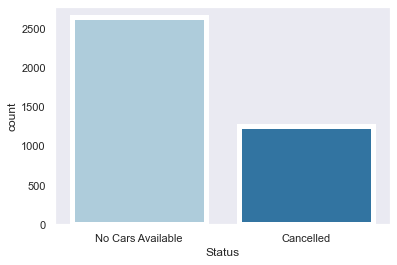

In [27]:
# Lets create a plot showing frequency of requests that get cancelled or show 'No cars Available'

sns.countplot(data=uber_data[uber_data.Status != 'Trip Completed'], x="Status", palette="Paired", 
              linewidth=5, order = ['No Cars Available','Cancelled'])

In [28]:
# We can clearly see that 'No Cars Available' count is more than 'Cancelled' count

#### Lets see the status of cars vs Days of week

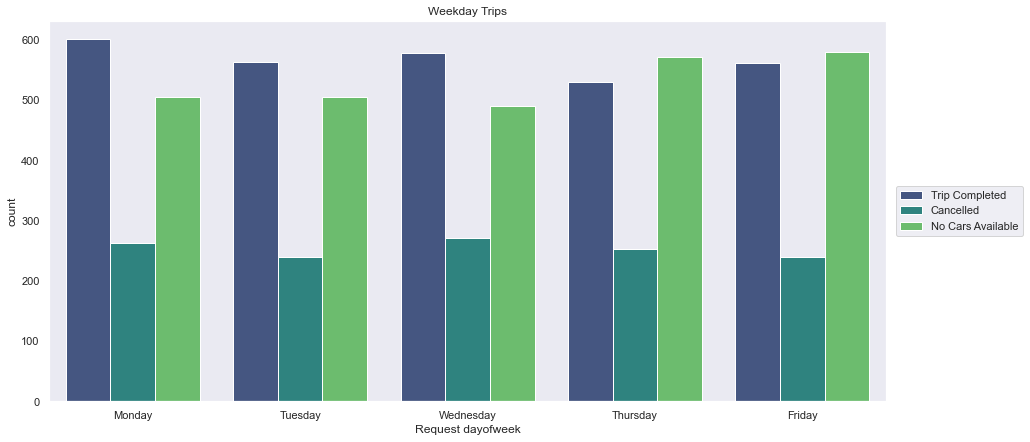

In [29]:
# Status for each day
fig, ax = plt.subplots(figsize=(15,7))
plt.title("Weekday Trips")
ax = sns.countplot(data=uber_data, x="Request dayofweek",hue='Status',palette='viridis')
plt.legend(bbox_to_anchor=(1.17, 0.5), loc='right')

In [30]:
# We can see that 'Cancelled' is almost same on all weekdays

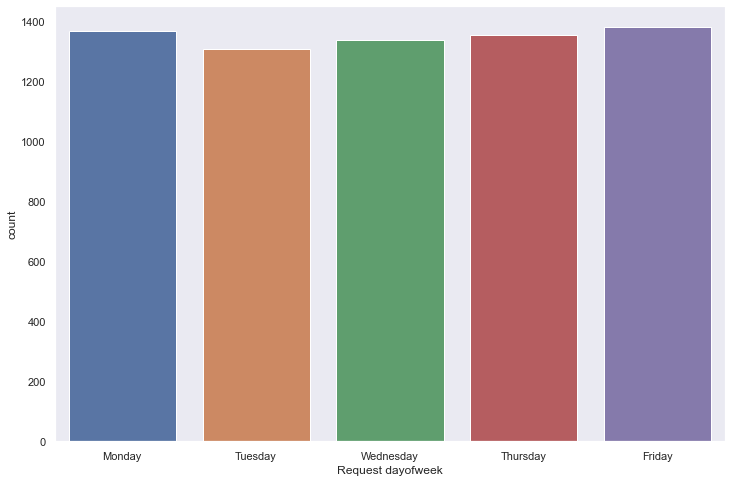

In [31]:
# Let as see the number of request count per days

plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(data=uber_data, x='Request dayofweek')
plt.show()

In [32]:
# We can see that there isn't much difference in request on weekdays

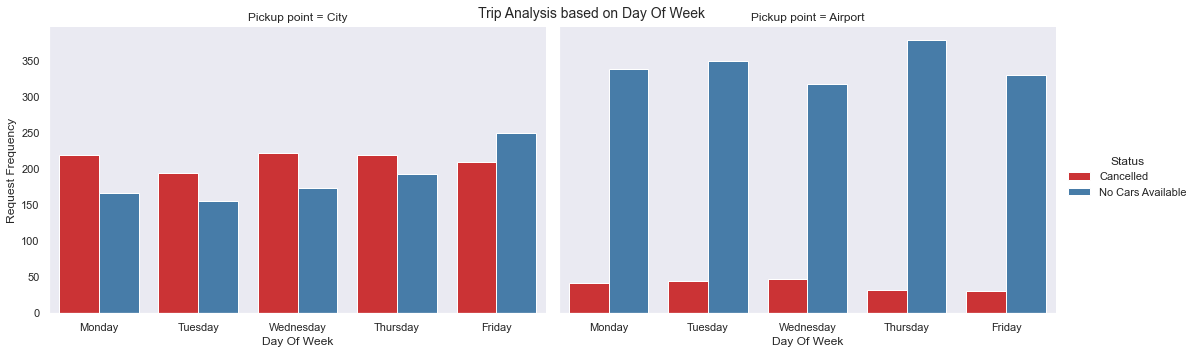

In [33]:
# Lets see the status vs days of week again each pick up point.

order_days = ['Monday','Tuesday','Wednesday','Thursday','Friday']

filter_trip_status_df = uber_data[(uber_data['Status'] == 'Cancelled') | (uber_data['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request dayofweek", col= 'Pickup point', hue="Status", palette='Set1', kind="count", 
                   data=filter_trip_status_df, aspect=1.5, order=order_days);

plot.fig.suptitle('Trip Analysis based on Day Of Week', fontsize=14)
plot.set_xlabels('Day Of Week', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

Following things can be seen from the above plots

- For trips from city, except for friday, cancelled trips are more for all other days of week
- For trips from airport, for all days there are more number of No Cars Available

#### Let us see the request per hour.


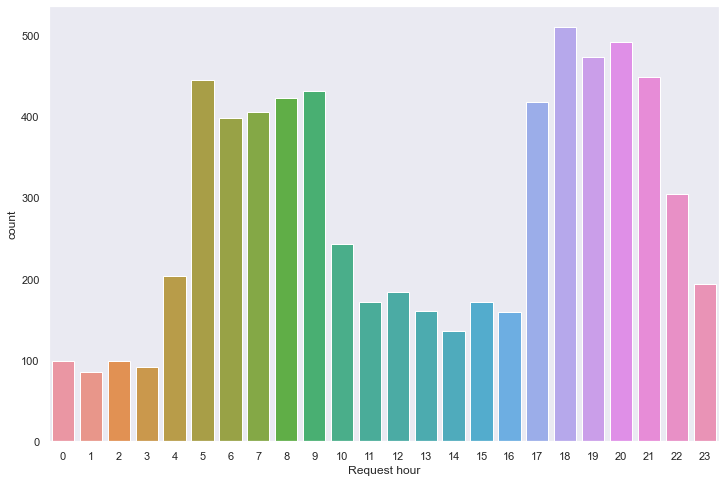

In [34]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(data=uber_data, x='Request hour')
plt.show()

In [35]:
# We can see that the in the early morning hours and evening hours there is high request.

#### Let us check them separatly ( Airport & City )

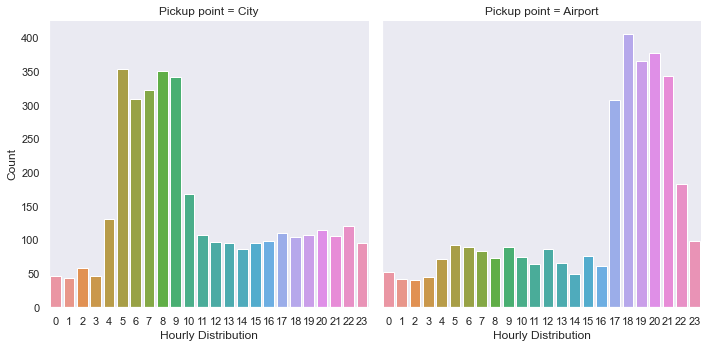

In [36]:
# Hourly distribution by Pickup point

g=sns.catplot(data=uber_data,x="Request hour",col="Pickup point",kind="count",col_order = ['City','Airport'])
g.set_axis_labels("Hourly Distribution" ,"Count")

#### Lets plot number of request per hour by their status.


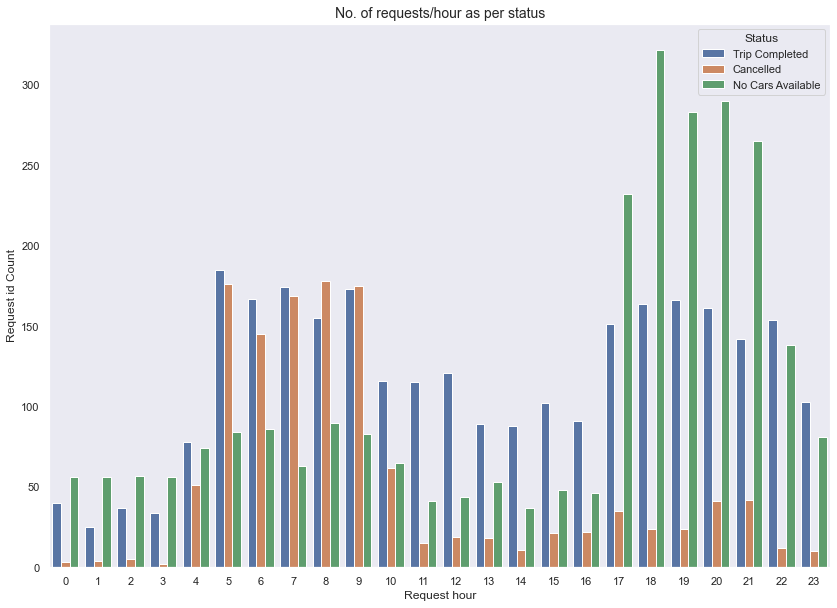

In [37]:
plt.figure(figsize=(14,10))
sns.barplot(data=uber_data,x='Request hour',y='Request id',hue='Status',estimator=len)
plt.title("No. of requests/hour as per status", fontsize=14)
plt.ylabel("Request id Count")
plt.show()

### Now lets plot a graph for request/hour of City & Airport


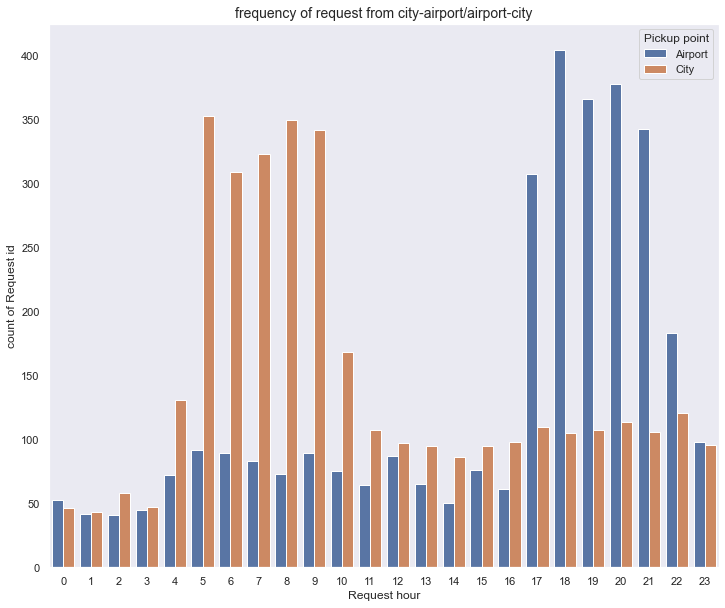

In [38]:
plt.figure(figsize=(12,10))
sns.barplot(data=uber_data,x='Request hour', y='Request id', hue='Pickup point',estimator=len)
plt.title("frequency of request from city-airport/airport-city",fontsize=14)
plt.ylabel("count of Request id")
plt.show()

In [39]:
# We can see in the above plot that most of the people requests for the car in the Morning or Eve#ning.

#### Now lets plot the request by timeslot.

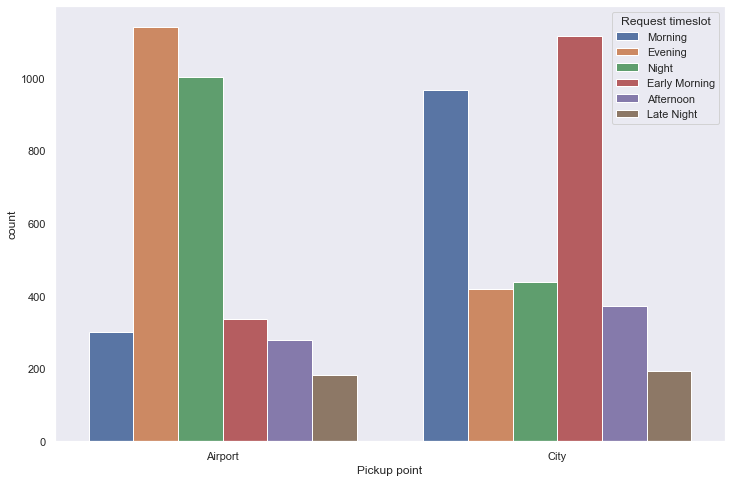

In [40]:
# Segmenting pickup point over time slot
plt.figure(num=None, figsize=(12, 8))
sns.countplot(data=uber_data,x='Pickup point', hue="Request timeslot")
plt.show()

In [41]:
# We can see from above plot that Airport has more requests in Evening and City has more requests in the Morning.

#### Lets plot frequency of request

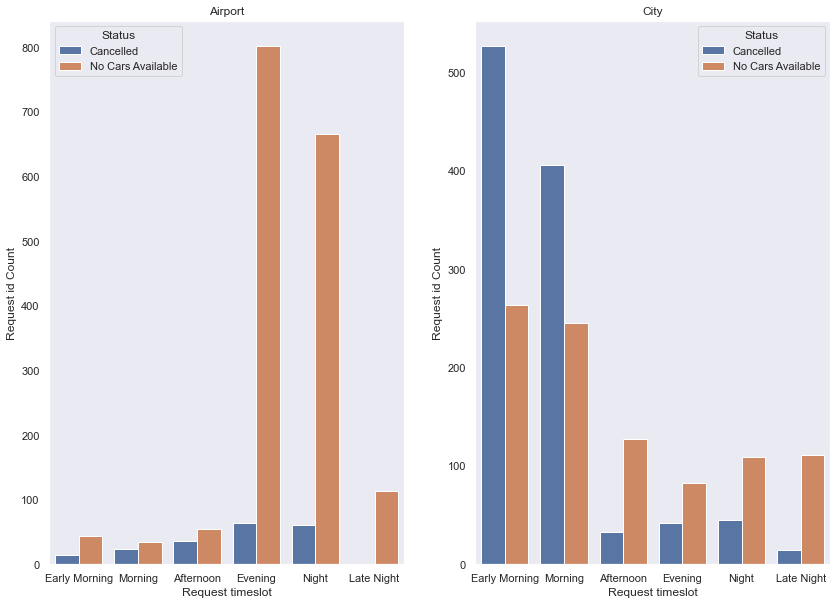

In [42]:
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']
plt.figure(figsize=(14,10))
plt.subplot(1,2,1)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=uber_data[(uber_data['Pickup point']=='Airport')&
(uber_data['Status']!='Trip Completed')],estimator=len,order = order_timeslot)
plt.title("Airport")
plt.ylabel("Request id Count")


plt.subplot(1,2,2)
sns.barplot(x='Request timeslot',y='Request id',hue='Status',data=uber_data[(uber_data['Pickup point']=='City')&
(uber_data['Status']!='Trip Completed')],estimator=len, order = order_timeslot)
plt.title("City")
plt.ylabel("Request id Count")
plt.show()

In [43]:
# We can see that the highest cancellation is in early morning and the highest 'no cars available' is in evening & night.

#### Now lets check with trip status

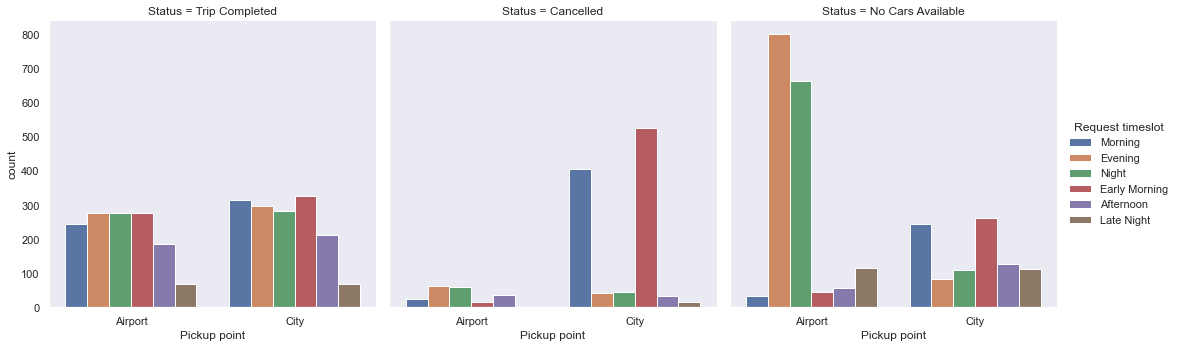

In [44]:
sns.catplot(data=uber_data,x='Pickup point',col="Status", hue = 'Request timeslot',kind="count")
plt.show()

In [45]:
# We can see that Airport requests during the evening slot(during which there is high airport request rate)there are no cars available
# Most city requests get cancelled in the morning slot(during which there is high city request rate)

#### Lets Analyze the frequency of request  for Non Available Cars from Airport & City for all timeslots.


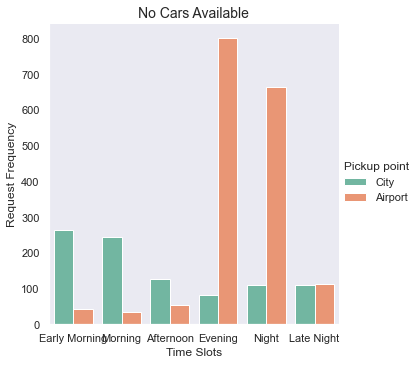

In [46]:
no_cars_available = uber_data[(uber_data['Status'] == 'No Cars Available')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set2", 
            data=no_cars_available, order = order_timeslot)

plt.title('No Cars Available', fontsize = 14)
plt.ylabel('Request Frequency', fontsize = 12)
plt.xlabel('Time Slots', fontsize = 12)

plt.show()

Lets analyze the request frequency of cars for Cancelled Trips from airport & city for all timeslots.


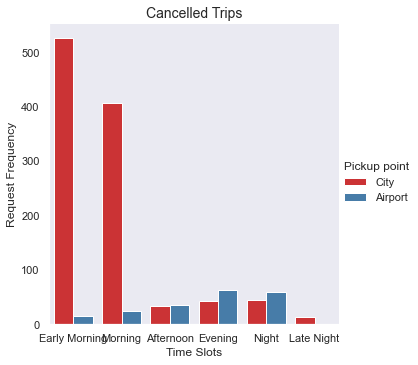

In [47]:
order_timeslot = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night', 'Late Night']

cancelled = uber_data[(uber_data['Status'] == 'Cancelled')]

plot = sns.catplot(x="Request timeslot", hue="Pickup point", kind="count", palette="Set1", 
            data=cancelled, order = order_timeslot);
plt.title('Cancelled Trips', fontsize = 14)
plt.ylabel("Request Frequency", fontsize = 12)
plt.xlabel("Time Slots", fontsize = 12)

plt.show()

In [48]:
# We can see that maximum number of cancellation are from airport in morning.

#### Lets find out the approximate hours when more cars are not available during the identified timeslots and pickup point.

C:\Users\DUSHYANT AHIRE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


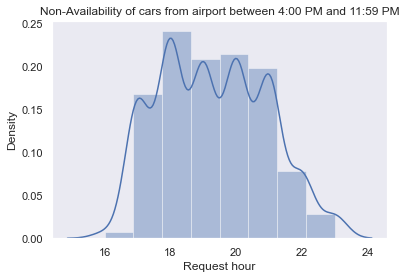

In [49]:
evening_unavailable_cars = no_cars_available[(((no_cars_available['Request timeslot'] == 'Evening') 
                                                     | (no_cars_available['Request timeslot'] == 'Night')) 
                                                    & (no_cars_available['Pickup point'] == 'Airport'))]
plt.title('Non-Availability of cars from airport between 4:00 PM and 11:59 PM') 
sns.distplot(evening_unavailable_cars['Request hour'], bins=8) 
plt.show()

In [50]:
# We can see that the more number of cars are not available around 6:00 PM followed by 8:00 PM, 7:00 PM, 9:00 PM

- As more cars are cancelled from city - airport, for timeslots between 4:00 AM and 11:59 AM and
- More cars are unavailable from airport - city, for timeslots between 4:00 PM and 11:59 PM

Supply demand gap can be calculated as follows :
- Demand = Number of cars requested
- Supply = Cars that completed the trips.
- Supply Demand Gap = Cancelled cars plus unavailable cars

In [51]:
# Create demand column
uber_data.loc[(uber_data.Status == 'Trip Completed') | (uber_data.Status == 'Cancelled')| 
              (uber_data.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [52]:
# Create supply column
uber_data.loc[(uber_data.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [53]:
# Create gap column
uber_data.loc[(uber_data.Status == 'Cancelled')| (uber_data.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [54]:
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,Demand,Supply,NaN
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,Demand,Supply,NaN
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,Demand,Supply,NaN
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,Demand,Supply,NaN


In [55]:
uber_SupplyandDemand = pd.DataFrame([uber_data.demand,uber_data.supply,uber_data.gap]).transpose()
uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


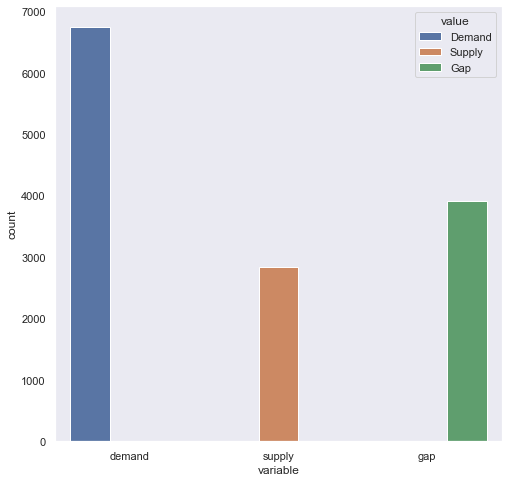

In [56]:
# Lets plot demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(uber_SupplyandDemand))
plt.show()

### Lets see this in pie chart

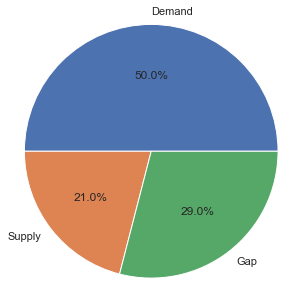

In [57]:
uber_data.loc[(uber_data.Status == 'Trip Completed') | (uber_data.Status == 'Cancelled')| (uber_data.Status == 'No Cars Available'), 
              'demand'] =1
uber_data.loc[(uber_data.Status == 'Trip Completed'), 'supply']=1
uber_data.loc[(uber_data.Status == 'Cancelled')| (uber_data.Status == 'No Cars Available'), 'gap'] =1


labels = ['Demand', 'Supply', 'Gap']
sizes = [uber_data['demand'].value_counts()[1],
         uber_data['supply'].value_counts()[1],
         uber_data['gap'].value_counts()[1],
         ]
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.show()

#### Lets create a new column to determine supply vs supply demand gap

In [58]:
# create a function that returns the value Supply or Supply Demand Gap based on the trip status

def setSupplyorSupplyDemandGap(x):
    if x == 'Trip Completed':
        return 'Supply'
    else:       
        return 'Supply demand gap'
    
uber_data['Supply demand gap'] = uber_data['Status'].apply(setSupplyorSupplyDemandGap)
uber_data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Request hour,Request timeslot,Request dayofweek,TripComp,NoCars,Cancel,demand,supply,gap,Supply demand gap
0,619,Airport,1,Trip Completed,2016-07-11 11:51:00,11,Morning,Monday,1.0,NaN,NaN,1,1,NaN,Supply
1,867,Airport,1,Trip Completed,2016-07-11 17:57:00,17,Evening,Monday,1.0,NaN,NaN,1,1,NaN,Supply
2,1807,City,1,Trip Completed,2016-07-12 09:17:00,9,Morning,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
3,2532,Airport,1,Trip Completed,2016-07-12 21:08:00,21,Night,Tuesday,1.0,NaN,NaN,1,1,NaN,Supply
4,3112,City,1,Trip Completed,2016-07-13 08:33:16,8,Morning,Wednesday,1.0,NaN,NaN,1,1,NaN,Supply


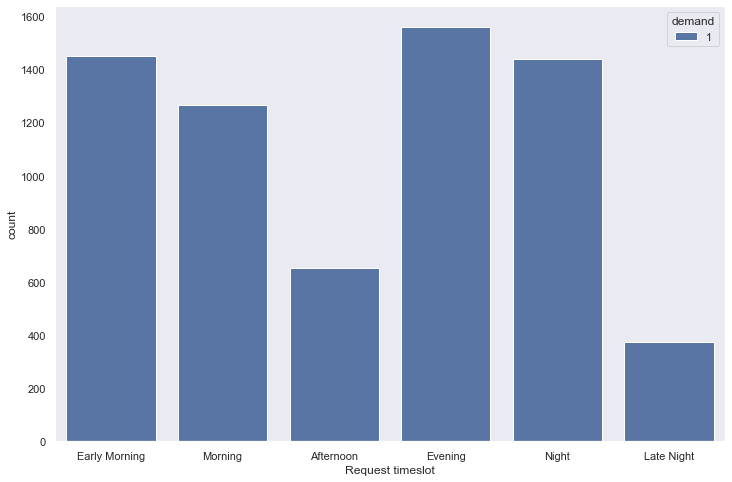

In [59]:
# segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(data=uber_data,x="Request timeslot",hue='demand',order=order_timeslot)
plt.show()

In [60]:
# We can see that the demand is high in evening ,early morning, morning & night. We cannot say at which pickup up point the demand is high so

#### Lets plot Demand at each pickup point. i.e Airport & City

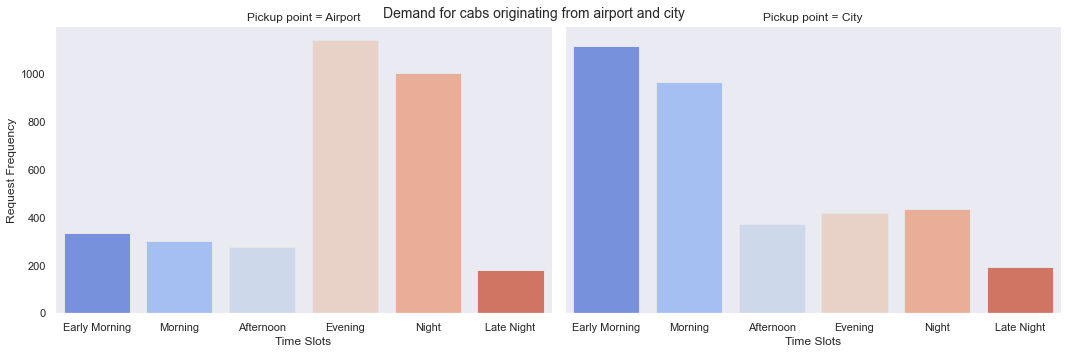

In [61]:
plot = sns.catplot(data=uber_data,x='Request timeslot', col="Pickup point", kind="count", palette="coolwarm", 
                   edgecolor=".9", aspect = 1.5, order = order_timeslot)

plot.fig.suptitle('Demand for cabs originating from airport and city', fontsize=14)
plot.set_xlabels('Time Slots', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

In [62]:
# We can see that 
# -For airport pickups, demand is more during the evening and night hours
# -For city pickups, demand is more during the early morning and morning

#### Lets find the time slots when the highest supply demand gap exists


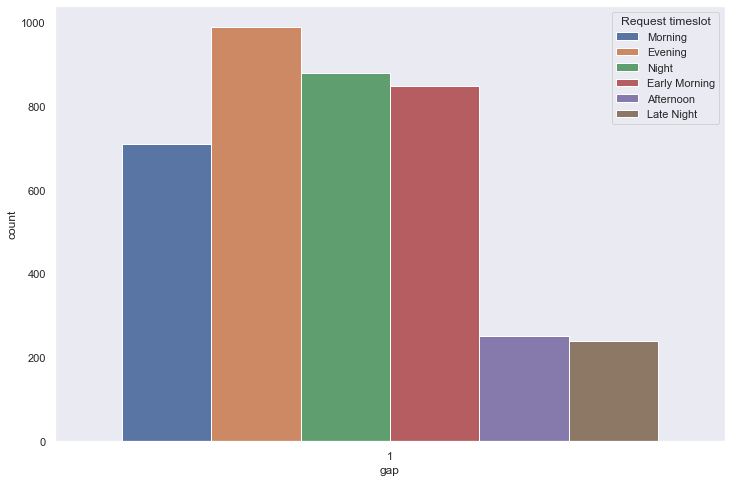

In [63]:
# Checking the gap at each time slot.
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="Request timeslot", data=uber_data)
total = len(uber_data['gap'])

plt.show()

In [64]:
# We can see that there is demand in early Morning , evening and night since it is the rush time.

#### Lets Check the Supply demand gap or gap at both pickup point.

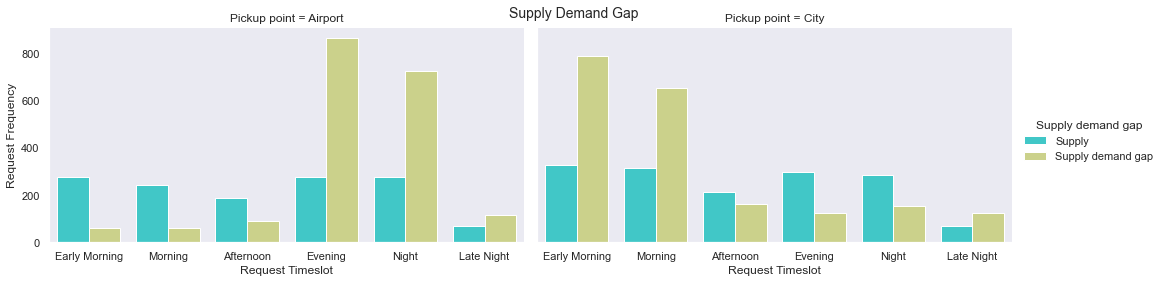

In [65]:

plot = sns.catplot(data=uber_data, x="Request timeslot", hue="Supply demand gap", col = 'Pickup point', palette='rainbow', 
            kind="count", height=4, aspect = 1.8, order = order_timeslot);

plot.fig.suptitle('Supply Demand Gap', fontsize=14)
plot.set_xlabels('Request Timeslot', fontsize=12)
plot.set_ylabels('Request Frequency', fontsize=12)
plt.show()

In [66]:
# We can see that 
# - The gap is more in the evening and night for pickup point Airport.
# - The gap is more in the early morning and morning for pickup point City.

#### Lets check the gap at every timeslot vs both pickup point.

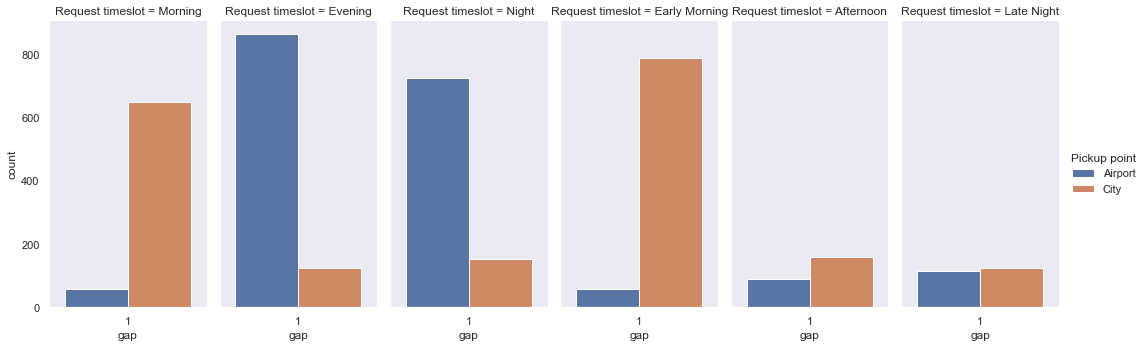

In [67]:
sns.catplot(data=uber_data ,x='gap',col="Request timeslot", hue = 'Pickup point',kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()

#### Lets check the gap at every hour vs both the pickup point

<Figure size 936x360 with 0 Axes>

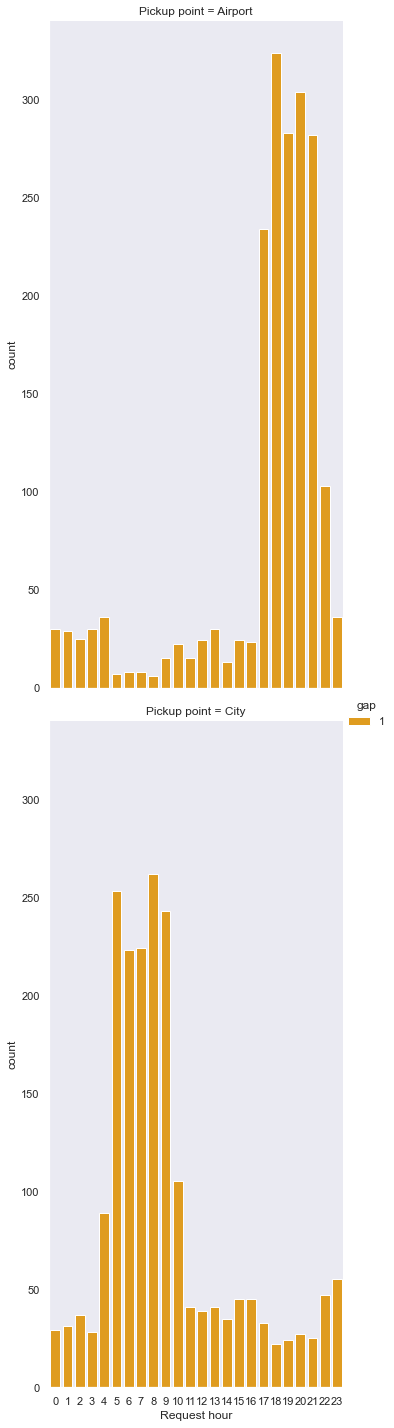

In [68]:
plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(data=uber_data ,x='Request hour',col="Pickup point", hue = 'gap',kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()

#### Now lets find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

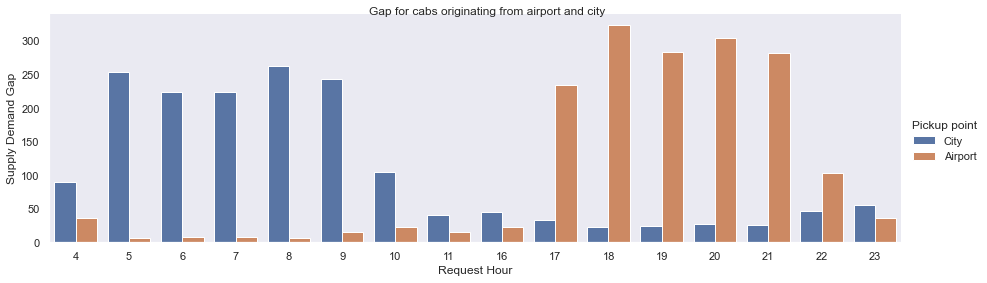

In [69]:
most_severe_gap = uber_data[((uber_data['Request timeslot'] == 'Evening') |
                           (uber_data['Request timeslot'] == 'Night') | 
                           (uber_data['Request timeslot'] == 'Early Morning') | 
                           (uber_data['Request timeslot'] == 'Morning')) & 
                          (uber_data['Supply demand gap'] == 'Supply demand gap')] 

plot = sns.catplot(data=most_severe_gap, x="Request hour", hue="Pickup point", kind="count", 
            height=4, aspect = 3.2)

plot.fig.suptitle('Gap for cabs originating from airport and city', fontsize=12)
plot.set_xlabels('Request Hour', fontsize=12)
plot.set_ylabels('Supply Demand Gap', fontsize=12)
plt.show()

In [70]:
# The above plot shows that the most severe supply demand gap.

### Observations



The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

Status: "No car available"

At Airport (airport to city)

When: Evening 

Status: "Cancelled"


At City  (city to airport)

When: Morning

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations. The 'gap' which exists are the hightest:

Status: "No car available"

At Airport (airport to city)

When: Evening 



Status: "Cancelled"

At City (city to airport)

When: Morning. 


And vice versa is not true:


   1. Morning hours :There is no high demand for cabs from airport to city 
   
   2. Evening hours: There is no high demand for cabs from city to airport
   
   
This tells us that there are more outbound flights in the morning and inbound flights in the evening.

### The reason for the issue:

In the morning hours: Though there is high demand for cabs from city to airport, the vice versa is not true.
                      Hence the driver tends to 'cancel' the request as getting a return trip from airport 
                      to city would be tough.

In the evening hours: Though there is high demand for cabs from airport to city, the vice versa is not true.
                      Hence 'no cars available' in the airport is the hightest in the evening.

### Possible suggestions to fill the supply demand gap:

- Provide incentives for airport trips during peak time.
- Assigning few extra cabs specially to the airport trips.
- Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
- Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
- Promote continuous trip to airport with incentives.
- Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.